In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
import pandas as pd
import os

# Lijst om de dataframes op te slaan
df_list = []

# Bepaal het huidige werkmap (de map waarin het script wordt uitgevoerd)
huidige_map = os.getcwd()

# Verkrijg het pad naar de map één niveau hoger
parent_map = os.path.dirname(huidige_map)

# Specificeer de naam van de submap waarin de CSV-bestanden zich bevinden
submap_naam = 'data'

# Creëer het volledige pad naar de 'data' map
directory = os.path.join(parent_map, submap_naam)

# Ga door elk bestand in de gespecificeerde directory
for filename in os.listdir(directory):
    # Controleer of het bestand een CSV-bestand is
    if filename.endswith('.csv'):
        # Volledige pad naar het bestand
        file_path = os.path.join(directory, filename)
        
        # Lees het CSV-bestand in een dataframe
        df = pd.read_csv(file_path)
        
        # Verwijder de extensie van de bestandsnaam
        filename_without_extension = os.path.splitext(filename)[0]

        # Voeg een nieuwe kolom toe met de naam van het CSV-bestand
        df['geboortedatum'] = filename_without_extension
        
        # Voeg de dataframe toe aan de lijst
        df_list.append(df)

# Combineer alle dataframes in de lijst tot één dataframe
df_origineel = pd.concat(df_list, ignore_index=True)

display(df_origineel)


,gemeente,naam,geslacht,verwachte datum,geboortedatum
0,Ukkel,Clara,Vrouwelijk,09/08/2019,2019-8-30
1,Brasschaat,Joeri,Mannelijk,08/26/2019,2019-8-30
2,Waver,Axel,Mannelijk,09/14/2019,2019-8-30
3,Seraing,Osman,Mannelijk,08/26/2019,2019-8-30
4,Aywaille,Wendy,Vrouwelijk,09/12/2019,2019-8-30
...,...,...,...,...,...
116918,Gent,Monique,Vrouwelijk,09/12/2019,2019-8-29
116919,Torhout,Tom,Mannelijk,09/12/2019,2019-8-29
116920,Lochristi,Werner,Mannelijk,08/31/2019,2019-8-29
116921,La Louvière,Cédric,Mannelijk,09/05/2019,2019-8-29


In [5]:
# Converteer 'verwachte datum' naar datetime met het formaat maand/dag/jaar
df_origineel['verwachte datum'] = pd.to_datetime(df_origineel['verwachte datum'], format='%m/%d/%Y', errors='coerce')

#Print mijn dataframe met geconverteerde kolom verwachte datum
print("Dataframe volledig:")
display(df_origineel)


#Print niet geconverteerde/ongeldige rijen
print("Dataframe waar de verwachte datum NaT is:")
rows_with_nan = df_origineel[df_origineel['verwachte datum'].isna()]
display(rows_with_nan)



Dataframe volledig:


,gemeente,naam,geslacht,verwachte datum,geboortedatum
0,Ukkel,Clara,Vrouwelijk,2019-09-08,2019-8-30
1,Brasschaat,Joeri,Mannelijk,2019-08-26,2019-8-30
2,Waver,Axel,Mannelijk,2019-09-14,2019-8-30
3,Seraing,Osman,Mannelijk,2019-08-26,2019-8-30
4,Aywaille,Wendy,Vrouwelijk,2019-09-12,2019-8-30
...,...,...,...,...,...
116918,Gent,Monique,Vrouwelijk,2019-09-12,2019-8-29
116919,Torhout,Tom,Mannelijk,2019-09-12,2019-8-29
116920,Lochristi,Werner,Mannelijk,2019-08-31,2019-8-29
116921,La Louvière,Cédric,Mannelijk,2019-09-05,2019-8-29


Dataframe waar de verwachte datum NaT is:


,gemeente,naam,geslacht,verwachte datum,geboortedatum


In [6]:
# Converteer 'geboortedatum' naar datetime met het formaat maand/dag/jaar
df_origineel['geboortedatum'] = pd.to_datetime(df_origineel['geboortedatum'], format='%Y-%m-%d', errors='coerce')

#Print mijn dataframe met geconverteerde kolom verwachte datum
print("Dataframe volledig:")
display(df_origineel)

#Print niet geconverteerde/ongeldige rijen
print("Dataframe waar de geboortedatum NaT is:")
rows_with_nan = df_origineel[df_origineel['geboortedatum'].isna()]
display(rows_with_nan)

Dataframe volledig:


,gemeente,naam,geslacht,verwachte datum,geboortedatum
0,Ukkel,Clara,Vrouwelijk,2019-09-08,2019-08-30
1,Brasschaat,Joeri,Mannelijk,2019-08-26,2019-08-30
2,Waver,Axel,Mannelijk,2019-09-14,2019-08-30
3,Seraing,Osman,Mannelijk,2019-08-26,2019-08-30
4,Aywaille,Wendy,Vrouwelijk,2019-09-12,2019-08-30
...,...,...,...,...,...
116918,Gent,Monique,Vrouwelijk,2019-09-12,2019-08-29
116919,Torhout,Tom,Mannelijk,2019-09-12,2019-08-29
116920,Lochristi,Werner,Mannelijk,2019-08-31,2019-08-29
116921,La Louvière,Cédric,Mannelijk,2019-09-05,2019-08-29


Dataframe waar de geboortedatum NaT is:


,gemeente,naam,geslacht,verwachte datum,geboortedatum
70768,Kruisem,Patrick,Mannelijk,2019-02-27,NaT
70769,Montigny-le-Tilleul,Sarah,Vrouwelijk,2019-03-11,NaT
70770,Diepenbeek,Valentinus,Mannelijk,2019-03-02,NaT
70771,Sint-Jans-Molenbeek,El,Mannelijk,2019-02-27,NaT
70772,Overijse,Apolline,Vrouwelijk,2019-03-03,NaT
...,...,...,...,...,...
70836,Herentals,Leen,Vrouwelijk,2019-03-10,NaT
70837,’s Gravenbrakel,Caroline,Vrouwelijk,2019-03-02,NaT
70838,Ieper,Marleen,Vrouwelijk,2019-03-12,NaT
70839,Ciney,Alain,Mannelijk,2019-02-28,NaT


In [7]:
# Maak een kopie van de dataframe waar de geboortedatum niet NaT is
df_dates = df_origineel[~df_origineel['geboortedatum'].isna()].copy()

# Maak een kopie van de dataframe waar de geboortedatum NaT is
df_error = df_origineel[df_origineel['geboortedatum'].isna()].copy()

# Voeg een kolom "opmerking" toe aan df_error met de waarde "foutieve datum (2019-02-29)"
df_error['opmerking'] = "foutieve datum (2019-02-29)"

# Toon de dataframes
print("Dataframe waar de geboortedatum niet NaT is:")
display(df_dates)

print("\nDataframe waar de geboortedatum NaT is:")
display(df_error)


Dataframe waar de geboortedatum niet NaT is:


,gemeente,naam,geslacht,verwachte datum,geboortedatum
0,Ukkel,Clara,Vrouwelijk,2019-09-08,2019-08-30
1,Brasschaat,Joeri,Mannelijk,2019-08-26,2019-08-30
2,Waver,Axel,Mannelijk,2019-09-14,2019-08-30
3,Seraing,Osman,Mannelijk,2019-08-26,2019-08-30
4,Aywaille,Wendy,Vrouwelijk,2019-09-12,2019-08-30
...,...,...,...,...,...
116918,Gent,Monique,Vrouwelijk,2019-09-12,2019-08-29
116919,Torhout,Tom,Mannelijk,2019-09-12,2019-08-29
116920,Lochristi,Werner,Mannelijk,2019-08-31,2019-08-29
116921,La Louvière,Cédric,Mannelijk,2019-09-05,2019-08-29



Dataframe waar de geboortedatum NaT is:


,gemeente,naam,geslacht,verwachte datum,geboortedatum,opmerking
70768,Kruisem,Patrick,Mannelijk,2019-02-27,NaT,foutieve datum (2019-02-29)
70769,Montigny-le-Tilleul,Sarah,Vrouwelijk,2019-03-11,NaT,foutieve datum (2019-02-29)
70770,Diepenbeek,Valentinus,Mannelijk,2019-03-02,NaT,foutieve datum (2019-02-29)
70771,Sint-Jans-Molenbeek,El,Mannelijk,2019-02-27,NaT,foutieve datum (2019-02-29)
70772,Overijse,Apolline,Vrouwelijk,2019-03-03,NaT,foutieve datum (2019-02-29)
...,...,...,...,...,...,...
70836,Herentals,Leen,Vrouwelijk,2019-03-10,NaT,foutieve datum (2019-02-29)
70837,’s Gravenbrakel,Caroline,Vrouwelijk,2019-03-02,NaT,foutieve datum (2019-02-29)
70838,Ieper,Marleen,Vrouwelijk,2019-03-12,NaT,foutieve datum (2019-02-29)
70839,Ciney,Alain,Mannelijk,2019-02-28,NaT,foutieve datum (2019-02-29)


In [8]:
def geboortes_per_dag(df):

    """
    Bereken het aantal geboortes per dag van het jaar.
    
    Parameters:
        df (pandas.DataFrame): De dataframe met geboortedata.
    
    Returns:
        pandas.DataFrame: Dataframe met het aantal geboortes per dag van het jaar.
    """

    # Maak een kopie van de dataframe
    df_geboortes = df.copy()
    
    # Creëer een nieuwe kolom 'dag_van_het_jaar' met de dag van het jaar
    df_geboortes['dag_van_het_jaar'] = df['geboortedatum'].dt.dayofyear
    
    # Groepeer de gegevens op basis van de dag van het jaar en tel het aantal geboortedatums per dag
    df_geboortes = df_geboortes.groupby('dag_van_het_jaar').size().reset_index(name='aantal_geboortes')
    
    return df_geboortes

df_geboortes = geboortes_per_dag(df_dates)
print("Dataframe met aantal geboortes per dag:")
display(df_geboortes)

Dataframe met aantal geboortes per dag:


,dag_van_het_jaar,aantal_geboortes
0,1,534
1,2,310
2,3,317
3,4,319
4,5,330
...,...,...
360,361,315
361,362,313
362,363,310
363,364,312


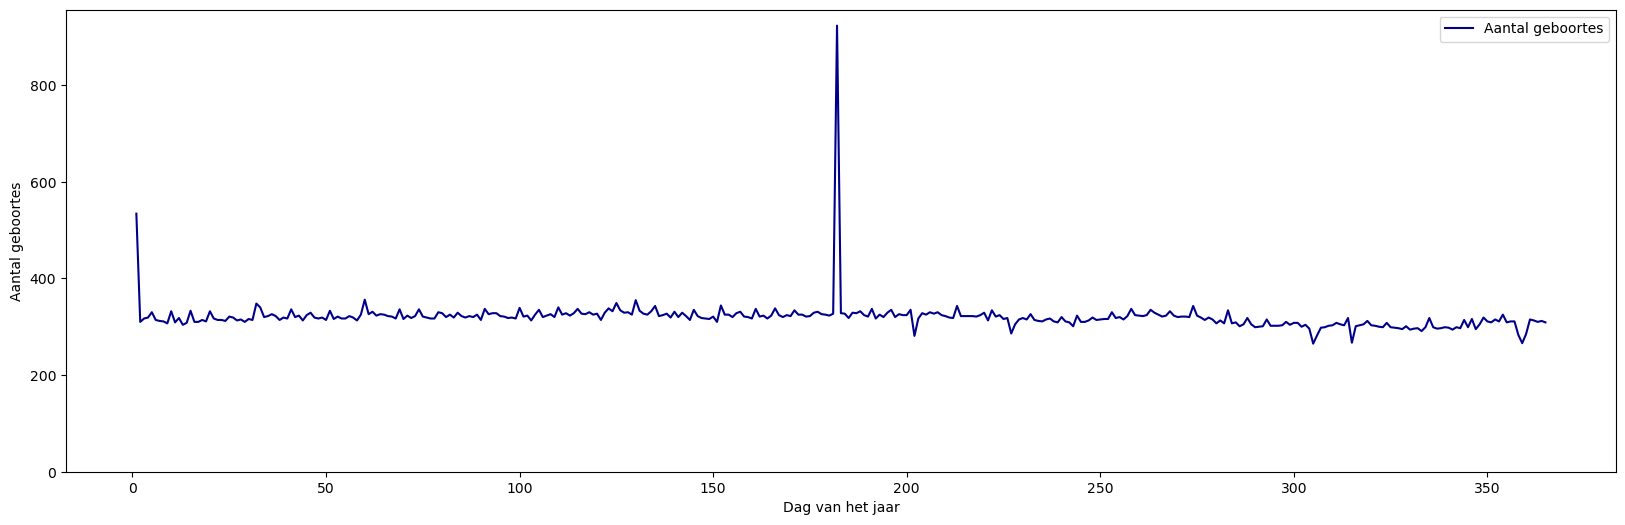

In [9]:
def plot_aantal_geboortes_per_dag(df_geboortes):
    """
    Plot het aantal geboortes per dag van het jaar.
    
    Parameters:
        df_geboortes (pandas.DataFrame): DataFrame met het aantal geboortes per dag van het jaar.
    """
    plt.figure(figsize=(20, 6))
    plt.plot(df_geboortes['dag_van_het_jaar'], df_geboortes['aantal_geboortes'], label='Aantal geboortes', color='darkblue')
    plt.xlabel('Dag van het jaar')
    plt.ylabel('Aantal geboortes')
    plt.yticks([0, 200, 400, 600, 800]) 
    plt.legend()
    plt.show()

# Voorbeeld van gebruik:
# Plot het aantal geboortes per dag van het jaar voor de dataframe df_geboortes
plot_aantal_geboortes_per_dag(df_geboortes)


In [10]:
# Bereken het gemiddelde van alle 'aantal_geboortes'
gemiddelde_aantal_geboortes = df_geboortes['aantal_geboortes'].mean()

print(f"Het gemiddelde is: {gemiddelde_aantal_geboortes}")

# Bereken de grens voor een outlier
grens_outlier = 0.5 * gemiddelde_aantal_geboortes

# Maak de kolom 'outlier' aan met de waarde 'yes' als de waarde in 'aantal_geboortes' meer dan 50% afwijkt van het gemiddelde
df_geboortes['outlier'] = np.where(np.abs(df_geboortes['aantal_geboortes'] - gemiddelde_aantal_geboortes) > grens_outlier, 'yes', 'no')

# Toon het dataframe met de nieuwe kolom 'outlier'
display(df_geboortes)

# Filter de rijen waar 'outlier' gelijk is aan 'yes'
df_outliers = df_geboortes[df_geboortes['outlier'] == 'yes']

# Toon het dataframe met alleen de outlier-rijen
display(df_outliers)




Het gemiddelde is: 320.13698630136986


,dag_van_het_jaar,aantal_geboortes,outlier
0,1,534,yes
1,2,310,no
2,3,317,no
3,4,319,no
4,5,330,no
...,...,...,...
360,361,315,no
361,362,313,no
362,363,310,no
363,364,312,no


,dag_van_het_jaar,aantal_geboortes,outlier
0,1,534,yes
181,182,923,yes


In [11]:
# Definieer de datums om te filteren
datum_1 = '2019-01-01'
datum_2 = '2019-07-01'

# Verwijder alle rijen waar de geboortedatum gelijk is aan datum_1 of datum_2
df_dates_excluded = df_dates[(df_dates['geboortedatum'] != datum_1) & (df_dates['geboortedatum'] != datum_2)]

# Toon het bijgewerkte dataframe
display(df_dates)
print("Dataframe zonder de genoemde datums:")
display(df_dates_excluded)


,gemeente,naam,geslacht,verwachte datum,geboortedatum
0,Ukkel,Clara,Vrouwelijk,2019-09-08,2019-08-30
1,Brasschaat,Joeri,Mannelijk,2019-08-26,2019-08-30
2,Waver,Axel,Mannelijk,2019-09-14,2019-08-30
3,Seraing,Osman,Mannelijk,2019-08-26,2019-08-30
4,Aywaille,Wendy,Vrouwelijk,2019-09-12,2019-08-30
...,...,...,...,...,...
116918,Gent,Monique,Vrouwelijk,2019-09-12,2019-08-29
116919,Torhout,Tom,Mannelijk,2019-09-12,2019-08-29
116920,Lochristi,Werner,Mannelijk,2019-08-31,2019-08-29
116921,La Louvière,Cédric,Mannelijk,2019-09-05,2019-08-29


Dataframe zonder de genoemde datums:


,gemeente,naam,geslacht,verwachte datum,geboortedatum
0,Ukkel,Clara,Vrouwelijk,2019-09-08,2019-08-30
1,Brasschaat,Joeri,Mannelijk,2019-08-26,2019-08-30
2,Waver,Axel,Mannelijk,2019-09-14,2019-08-30
3,Seraing,Osman,Mannelijk,2019-08-26,2019-08-30
4,Aywaille,Wendy,Vrouwelijk,2019-09-12,2019-08-30
...,...,...,...,...,...
116918,Gent,Monique,Vrouwelijk,2019-09-12,2019-08-29
116919,Torhout,Tom,Mannelijk,2019-09-12,2019-08-29
116920,Lochristi,Werner,Mannelijk,2019-08-31,2019-08-29
116921,La Louvière,Cédric,Mannelijk,2019-09-05,2019-08-29


In [12]:
df_geboortes_excluded = geboortes_per_dag(df_dates_excluded)
print("Dataframe met aantal geboortes per dag:")
display(df_geboortes_excluded)

Dataframe met aantal geboortes per dag:


,dag_van_het_jaar,aantal_geboortes
0,2,310
1,3,317
2,4,319
3,5,330
4,6,314
...,...,...
358,361,315
359,362,313
360,363,310
361,364,312


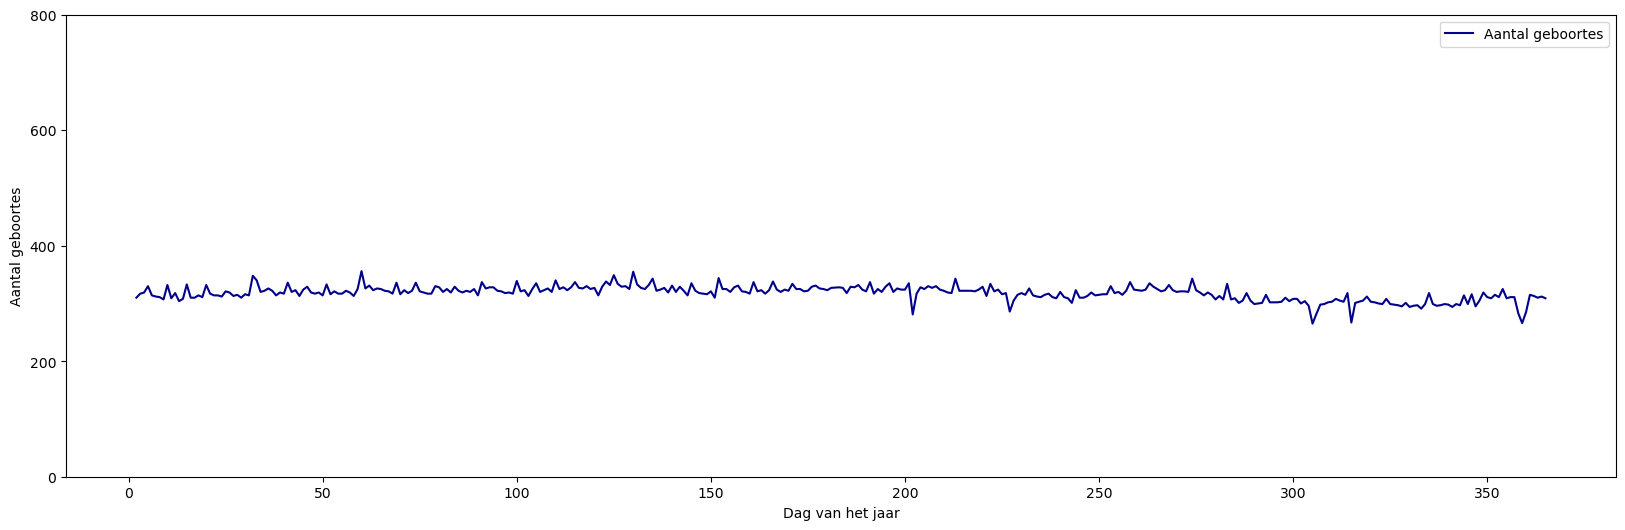

In [13]:

plot_aantal_geboortes_per_dag(df_geboortes_excluded)

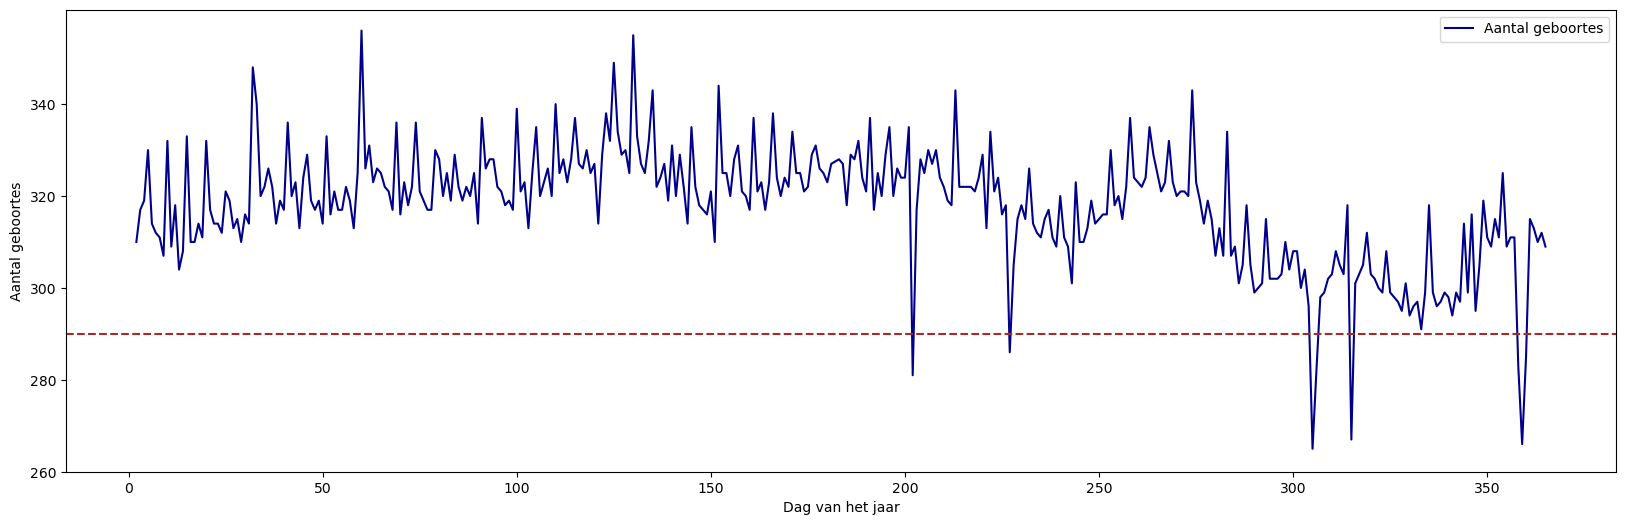

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(df_geboortes_excluded['dag_van_het_jaar'], df_geboortes_excluded['aantal_geboortes'], label='Aantal geboortes',  color='darkblue')
plt.xlabel('Dag van het jaar')
plt.ylabel('Aantal geboortes')
plt.yticks([260, 280, 300, 320, 340]) 
plt.legend()

# Voeg een gestippelde horizontale lijn toe op y = 290
plt.axhline(y=290, color='brown', linestyle='--')


plt.show()

In [15]:
def get_dagen_lager_dan_threshold(df, threshold):
    """
    Selecteer dagen waarop het aantal geboortes lager is dan de opgegeven drempelwaarde en geef deze terug als een lijst.
    
    Parameters:
        df (pandas.DataFrame): De dataframe met geboortedata.
        threshold (int): De drempelwaarde waarmee het aantal geboortes vergeleken wordt.
    
    Returns:
        list: Een lijst met dagen waarop het aantal geboortes lager is dan de drempelwaarde.
    """
    # Selecteer dagen lager dan de drempelwaarde en converteer ze naar een lijst
    dagen_lager_dan_threshold = df[df['aantal_geboortes'] < threshold]['dag_van_het_jaar'].tolist()
    
    return dagen_lager_dan_threshold


def convert_dayofyear_to_date(dayofyear, year):
    """
    Converteer een dag van het jaar naar een exacte datum binnen een bepaald jaar.

    Parameters:
        dayofyear (int): De dag van het jaar.
        year (int): Het jaar waarin de dag zich bevindt.

    Returns:
        datetime.date: De exacte datum.
    """
    return datetime.datetime.strptime(f'{year}-{dayofyear}', '%Y-%j').date()


# Voorbeeld van gebruik:
# Definieer de drempelwaarde
Treshold = 290

# Roep de functie aan met de dataframe en de treshold
dagen_lager_dan_threshold = get_dagen_lager_dan_threshold(df_geboortes_excluded, Treshold)

# Print de lijst met dagen
print(f'Dagen lager dan Treshold {Treshold}:')
print(dagen_lager_dan_threshold)

# Filter het dataframe df_geboortes_excluded op basis van de lijst dagen_lager_dan_threshold
gefilterde_df = df_geboortes_excluded[df_geboortes_excluded['dag_van_het_jaar'].isin(dagen_lager_dan_threshold)].copy()

# Converteer de dagen van het jaar naar exacte datums voor het jaar 2019
jaar = 2019
gefilterde_df['exacte_datum'] = gefilterde_df['dag_van_het_jaar'].apply(lambda x: convert_dayofyear_to_date(x, jaar))

# Toon het gefilterde dataframe met de nieuwe kolom 'exacte_datum'
display(gefilterde_df)

Dagen lager dan Treshold 290:
[202, 227, 305, 306, 315, 358, 359, 360]


,dag_van_het_jaar,aantal_geboortes,exacte_datum
199,202,281,2019-07-21
224,227,286,2019-08-15
302,305,265,2019-11-01
303,306,282,2019-11-02
312,315,267,2019-11-11
355,358,283,2019-12-24
356,359,266,2019-12-25
357,360,285,2019-12-26
